In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [44]:
df=pd.read_csv('survey_results.csv')
df

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30005,R29996,29,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200
30006,R29997,42,F,Urban,Working Professional,> 35L,3-4 times,Established,Small (250 ml),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250
30007,R29998,57,F,Metro,Retired,<10L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),150-200
30008,R29999,23,M,Urban,Working Professional,16L - 25L,5-7 times,Established,Small (250 ml),above 4,Quality,Exotic,Online,Eco-Friendly,Medium (Moderately health-conscious),Social (eg. Parties),150-200


In [45]:
#is there any duplicate values
count_duplicates=df['respondent_id'].duplicated().sum()
print("The Number of duplicate values =",count_duplicates)

The Number of duplicate values = 10


As respondent id is a unique identifier .we actually have 10 duplicates 

In [46]:
cols=df.columns
#columns that are having duplicate values

df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.describe()
#as age is the only integer column we got the statistics of the age

,age
count,30000.000000
mean,33.048167
std,13.438904
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


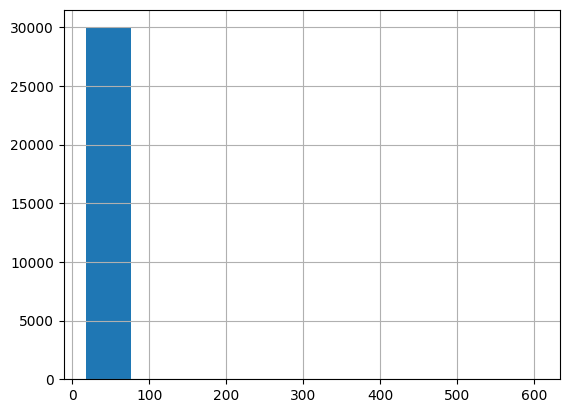

In [49]:
df['age'].hist()
plt.show()

In [50]:
var_age=df['age'].var()
std_age=df['age'].std()
mean_age=df['age'].std()

print("The variance of the Age =",var_age)
print("The std of the age columns=",std_age)
print("The mean age is =",mean_age)

The variance of the Age = 180.60413344333705
The std of the age columns= 13.43890372922349
The mean age is = 13.43890372922349


In [51]:
# lower_age=mean_age-3*std_age
lower_age=0
# upper_age=mean_age+3*std_age
upper_age=70

print("The lower bound of age is =",lower_age)
print("The upper bound of the age =",upper_age)

The lower bound of age is = 0
The upper bound of the age = 70


In [52]:
outlier_data=df[(df['age']>upper_age) | (df['age']<0)]

In [53]:
outlier_data.describe()

,age
count,9.000000
mean,368.555556
std,138.442327
min,192.000000
25%,267.000000
50%,428.000000
75%,453.000000
max,604.000000


In [54]:
df=df[(df['age']<=upper_age) & (df['age']>0)]

In [55]:
df.describe()

,age
count,29991.000000
mean,32.947484
std,11.906077
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,70.000000


So after removing the outliers using basic strategy that everyone's age >0 and age<=100

In [56]:
#handling the missing values in the income_level columns
df['income_levels'].isna().sum()

np.int64(8060)

In [57]:
df['income_levels'].fillna("Not Reported",inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22140\2246112029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income_levels'].fillna("Not Reported",inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_22140\2246112029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_levels'].fillna("Not Reported",inplace=True)


In [58]:
df['income_levels'].isna().sum()

np.int64(0)

So there are 8060 null values in income_levels .

as suggested i replaced them with the 'Not Reported' value

In [59]:
null_weekly_consume=df['consume_frequency(weekly)'].isna().sum()
print(null_weekly_consume)
df['consume_frequency(weekly)'].mode()[0]
#so lets replace the null values in consume_frequency column with 3-4 times


8


'3-4 times'

In [60]:
df['consume_frequency(weekly)'].fillna("3-4 times",inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22140\2477498583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['consume_frequency(weekly)'].fillna("3-4 times",inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_22140\2477498583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['consume_frequency(weekly)'].fillna("3-4 times",inplace=T

In [61]:
null_purchase_channel=df['purchase_channel'].isna().sum()
#we have 10 null values in purchase channel
print("The Null values in purchase column=",null_purchase_channel)

The Null values in purchase column= 10


In [62]:
mode_value_of_purchase_channel=df['purchase_channel'].mode()[0]    
print(mode_value_of_purchase_channel)
#lets replace the null values in purchase channel column with Online as a replacment value

Online


In [63]:
df['purchase_channel'].fillna('Online',inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_22140\4146995980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['purchase_channel'].fillna('Online',inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_22140\4146995980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchase_channel'].fillna('Online',inplace=True)


In [64]:
df['zone'].value_counts()

zone
Metro         11906
Urban         10686
Semi-Urban     5274
Rural          2116
urbna             5
Metor             4
Name: count, dtype: int64

In [65]:
df['current_brand'].value_counts()

current_brand
Established    15442
Newcomer       14499
newcomer          30
Establishd        20
Name: count, dtype: int64

In [66]:
#lets replace the spellings correctly
df['zone'].replace('urbna','Urban',inplace=True)
df['zone'].replace('Metor','Metro',inplace=True)
df['zone'].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_22140\4179160500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zone'].replace('urbna','Urban',inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_22140\4179160500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zone'].replace('urbna','Urban',inplace=True)
C:\Users\hp\AppData\Local\T

zone
Metro         11910
Urban         10691
Semi-Urban     5274
Rural          2116
Name: count, dtype: int64

In [67]:
df['current_brand'].replace('newcomer','Newcomer',inplace=True)
df['current_brand'].replace('Establishd','Established',inplace=True)
df['current_brand'].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_22140\2654484911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['current_brand'].replace('newcomer','Newcomer',inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_22140\2654484911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_brand'].replace('newcomer','Newcomer',inplace=Tru

current_brand
Established    15462
Newcomer       14529
Name: count, dtype: int64

In [68]:
df.to_csv('survey_results_cleaned.csv',index=False)

In [69]:
df

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30005,R29996,29,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200
30006,R29997,42,F,Urban,Working Professional,> 35L,3-4 times,Established,Small (250 ml),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250
30007,R29998,57,F,Metro,Retired,<10L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),150-200
30008,R29999,23,M,Urban,Working Professional,16L - 25L,5-7 times,Established,Small (250 ml),above 4,Quality,Exotic,Online,Eco-Friendly,Medium (Moderately health-conscious),Social (eg. Parties),150-200
